## Testing IRA

You may ignore...

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ira.csv')
df.head()

,province,city_muni,year,ira
0,Abra,Bangued,1992,0.000000
1,Abra,Bangued,1993,7.280949
2,Abra,Bangued,1994,10.311497
3,Abra,Bangued,1995,10.311497
4,Abra,Bangued,1996,12.435710


In [3]:
# sorted(df['year'].value_counts().index.tolist())

In [4]:
df_2016 = df[df.year==2016]
df_2016.head()

,province,city_muni,year,ira
24,Abra,Bangued,2016,96.897952
49,Abra,Boliney,2016,56.574216
74,Abra,Bucay,2016,60.534970
99,Abra,Bucloc,2016,35.734824
124,Abra,Daguioman,2016,40.996075


In [5]:
len(df_2016.city_muni)

1626

In [6]:
# set(df_2016.province.tolist())

In [7]:
# df_2016[df_2016.province == 'Metropolitan Manila']

Cities of interest: Pasay, Manila, Makati, San Juan, Mandaluyong

Population data: 
- https://worldpopulationreview.com/countries/cities/philippines
- https://en.wikipedia.org/wiki/List_of_cities_in_the_Philippines

Population as of 2015: 
- Pasay City: 416,522
- Manila: 1,600,000
- Makati City: 510,383
- San Juan: 121,430
- Mandaluyong: 305,576

In [12]:
cities = ['Pasay City', 'Manila', 'Makati City', 'San Juan', 'Mandaluyong']

# [city for city in df_2016.city_muni.tolist() if city in cities]

In [13]:
df2 = df_2016[(df_2016.province=='Metropolitan Manila') & (df_2016.city_muni.isin(cities))]

city_population_mapping = {'Pasay City': 416522,
                        'Manila': 1600000,
                        'Makati City': 510383,
                        'San Juan': 121430,
                        'Mandaluyong': 305576}

df2['population'] = df2.city_muni.map(city_population_mapping) 

df2.head()

C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,province,city_muni,year,ira,population
23287,Metropolitan Manila,Makati City,2016,944.018174,510383
23334,Metropolitan Manila,Mandaluyong,2016,640.808077,305576
23359,Metropolitan Manila,Manila,2016,2416.221197,1600000
23484,Metropolitan Manila,Pasay City,2016,692.291148,416522
23583,Metropolitan Manila,San Juan,2016,338.540311,121430


## Geospatial Analysis

In [14]:
import geopandas as gpd
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from fuzzywuzzy import process
from shapely.geometry import Polygon, Point

### Using GADM to get PH cities polygons

In [15]:
ph_city_gdf = gpd.read_file("gadm36_PHL_shp/" + "gadm36_PHL_2.shp")
ph_city_gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"POLYGON ((120.62710 17.49300, 120.62177 17.493..."
1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"POLYGON ((120.99042 17.39802, 120.98631 17.387..."
2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"POLYGON ((120.70788 17.45395, 120.70621 17.455..."
3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"POLYGON ((120.78956 17.41699, 120.78922 17.445..."
4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"POLYGON ((120.92917 17.41307, 120.92464 17.413..."


In [16]:
# fig, ax = plt.subplots(1, figsize=(15, 12))
# metro_manila_gdf = ph_city_gdf[ph_city_gdf["NAME_1"] == "Metropolitan Manila"]
# metro_manila_gdf.plot(ax=ax)

# for x, y, label in zip(metro_manila_gdf.geometry.centroid.x, 
#                        metro_manila_gdf.geometry.centroid.y, 
#                        metro_manila_gdf.NAME_2):
# #     ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
#     ax.annotate(label, xy=(x, y))


# ax.axis('off');

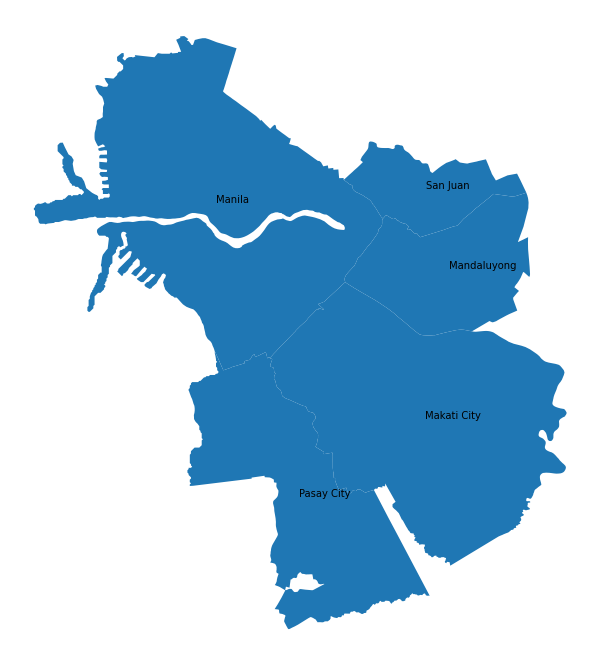

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 12))
metro_manila_gdf = ph_city_gdf[ph_city_gdf["NAME_1"] == "Metropolitan Manila"]
metro_manila_gdf = metro_manila_gdf[metro_manila_gdf["NAME_2"].isin(cities)]
metro_manila_gdf.plot(ax=ax)

for x, y, label in zip(metro_manila_gdf.geometry.centroid.x, 
                       metro_manila_gdf.geometry.centroid.y, 
                       metro_manila_gdf.NAME_2):
#     ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
    ax.annotate(label, xy=(x, y))

ax.axis('off');

In [18]:
metro_manila_gdf

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
962,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,"Makati, City of",None,Lungsod|Siyudad,City,137602,PH.MM.MK,"POLYGON ((121.06578 14.53872, 121.06594 14.538..."
964,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,Lungsod|Siyudad,City,137401,PH.MM.MD,"POLYGON ((121.05405 14.57747, 121.05408 14.577..."
965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.6_1,Manila,"City of Manila|Manila, City of",None,Lungsod|Siyudad,City,133900,PH.MM.MN,"POLYGON ((120.99142 14.56218, 120.98849 14.561..."
970,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.11_1,Pasay City,None,None,Lungsod|Siyudad,City,137605,PH.MM.PY,"POLYGON ((121.00084 14.50921, 121.00070 14.509..."
974,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.15_1,San Juan,None,None,Lungsod|Siyudad,City,137405,PH.AB.SJ,"POLYGON ((121.02965 14.59402, 121.02961 14.594..."


### Getting climate and demographic features

Cities of interest: Pasay, Manila, Makati, San Juan, Mandaluyong

Population data sources: 
- https://worldpopulationreview.com/countries/cities/philippines
- https://en.wikipedia.org/wiki/List_of_cities_in_the_Philippines

Population as of 2015: 
- Pasay City: 416,522
- Manila: 1,600,000
- Makati City: 510,383
- San Juan: 121,430
- Mandaluyong: 305,576

Climate sources:
- https://en.climate-data.org/asia/philippines/pasay/pasay-3101/
- https://en.climate-data.org/asia/philippines/batangas/san-juan-20381/
- https://en.climate-data.org/asia/philippines/manila/manila-1952/
- https://en.climate-data.org/asia/philippines/makati/makati-3104/
- https://en.climate-data.org/asia/philippines/mandaluyong/mandaluyong-1966/

altitude, rainfall, temperature (celsius), density:
- pasay: 8m, 1946mm, 27.3, 30000
- san juan: 21m, 1820mm, 27.2, 21000
- manila: 10m, 2047mm, 27.3, 42000
- makati: 18m, 2013mm, 27.3, 27000
- mandaluyong: 14m, 2093mm, 27.2, 18000

In [19]:
clean_gdf = metro_manila_gdf[['NAME_2', 'geometry']]
clean_gdf.columns = ['name', 'geometry']

clean_gdf['population'] = clean_gdf.name.map(city_population_mapping) 

# sequence: makati, mandaluyong, manila, pasay, san juan
clean_gdf['density'] = [27000, 18000, 42000, 30000, 21000]
clean_gdf['elevation'] = [18, 14, 10, 8, 21]
clean_gdf['rainfall'] = [2013, 2093, 2047, 1946, 1820]
clean_gdf['temperature'] = [27.3, 27.2, 27.3, 27.3, 27.2]

clean_gdf

C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jude_\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,name,geometry,population,density,elevation,rainfall,temperature
962,Makati City,"POLYGON ((121.06578 14.53872, 121.06594 14.538...",510383,27000,18,2013,27.3
964,Mandaluyong,"POLYGON ((121.05405 14.57747, 121.05408 14.577...",305576,18000,14,2093,27.2
965,Manila,"POLYGON ((120.99142 14.56218, 120.98849 14.561...",1600000,42000,10,2047,27.3
970,Pasay City,"POLYGON ((121.00084 14.50921, 121.00070 14.509...",416522,30000,8,1946,27.3
974,San Juan,"POLYGON ((121.02965 14.59402, 121.02961 14.594...",121430,21000,21,1820,27.2


### Getting spatial features

Get spatial info from overpass

Query:  
> natural=* in "Manila, Metro Manila"  
> building=* in "Manila, Metro Manila"  
> highway=* in "Manila, Metro Manila"  

buildings have API limit issues

In [20]:
# natural_gdf = gpd.read_file("overpass/metromanila_natural.geojson")
# natural_gdf.head()

In [21]:
# natural_gdf['addr:city'].value_counts()

In [22]:
# natural_gdf.columns

In [23]:
# makati_natural_gdf = gpd.read_file("overpass/makati_natural.geojson")
# makati_natural_gdf.head()

In [24]:
# natural_gdf['is_in:city'].value_counts()

In [25]:
# makati_natural_gdf.shape[0]

In [26]:
# sequence: makati, mandaluyong, manila, pasay, san juan
natural = []
highway = []
for city in ['makati', 'mandaluyong', 'manila', 'pasay', 'sanjuan']:
    natural_gdf = gpd.read_file(f"overpass/{city}_natural.geojson")
    highway_gdf = gpd.read_file(f"overpass/{city}_highway.geojson")
    natural += [natural_gdf.shape[0]]
    highway += [highway_gdf.shape[0]]

In [27]:
natural, highway

([340, 29, 287, 493, 26], [6755, 2725, 8970, 4156, 1486])

In [39]:
clean_gdf['natural'] = natural
clean_gdf['road'] = highway

# from Arjay
clean_gdf['climate resiliency index'] = [3.525, 4.192, 3.175, 3.808, 4.825]
clean_gdf['climate index'] = [2.5, 3.5, 2.5, 2.6, 5]
clean_gdf['environment index'] = [4.875, 4.075, 3.825, 3.825, 4.475]
clean_gdf['social index'] = [3.2, 5, 3.2, 5, 5]
clean_gdf['green spaces'] = [10, 8, 7, 5, 8]
clean_gdf['bodies of water'] = ['800 meter radius', '1 kilometer radius', '>800 meter radius', '600 meter radius', '1km radius']
clean_gdf['index legend'] = ['fairly resilient', 'resilient', 'at risk', 'fairly resilient', 'resilient']

clean_gdf

,name,geometry,population,density,elevation,rainfall,temperature,natural,road,climate resiliency index,climate index,environment index,social index,green spaces,bodies of water,index legend
962,Makati City,"POLYGON ((121.06578 14.53872, 121.06594 14.538...",510383,27000,18,2013,27.3,340,6755,3.525,2.5,4.875,3.2,10,800 meter radius,fairly resilient
964,Mandaluyong,"POLYGON ((121.05405 14.57747, 121.05408 14.577...",305576,18000,14,2093,27.2,29,2725,4.192,3.5,4.075,5.0,8,1 kilometer radius,resilient
965,Manila,"POLYGON ((120.99142 14.56218, 120.98849 14.561...",1600000,42000,10,2047,27.3,287,8970,3.175,2.5,3.825,3.2,7,>800 meter radius,at risk
970,Pasay City,"POLYGON ((121.00084 14.50921, 121.00070 14.509...",416522,30000,8,1946,27.3,493,4156,3.808,2.6,3.825,5.0,5,600 meter radius,fairly resilient
974,San Juan,"POLYGON ((121.02965 14.59402, 121.02961 14.594...",121430,21000,21,1820,27.2,26,1486,4.825,5.0,4.475,5.0,8,1km radius,resilient


### Saving engineered features except polygons

In [40]:
clean_gdf.drop('geometry', axis=1).to_csv('tigerdash.csv')

### Generating GeoJSON (for Mapbox)

format:

{"type":"FeatureCollection","features":[

    {"type":"Feature",
        "id":"01",
        "properties":{"name":"Alabama","density":94.65},
        "geometry":{"type":"Polygon","coordinates":[]}
    },
    ...,
    ...
]}

In [41]:
# lala = clean_gdf.iloc[0]['geometry']
# [list(point) for point in lala.exterior.coords]

In [42]:
tigerdash = {"type":"FeatureCollection","features":[]}

def get_coordinates(geometry):
    return [list(point) for point in geometry.exterior.coords]
    
def get_row_features(row, features):
    properties = {}
    for feature in features:
        properties[feature] = row[feature]
    return properties
    
features = ['name', 'population', 'density', 'elevation', 'rainfall', 'temperature',
            'natural', 'road', 'climate resiliency index', 'climate index', 
            'environment index', 'social index', 'green spaces', 'bodies of water', 'index legend']

for i, row in clean_gdf.iterrows():
    tigerdash_city = {"type":"Feature",
        "id": i,
#         "properties": {"name": row['city'], 
#                        "population": row['population'], 
#                        "density": row['density'], 
#                        "elevation": row["elevation"],
#                        "rainfall": row["rainfall"],
#                        "temperature": row["temperature"],
#                        "natural": row["natural"],
#                        "road": row["road"]},
        "properties": get_row_features(row, features),
        "geometry":{"type":"Polygon", "coordinates": [get_coordinates(row['geometry'])]}
    }
    tigerdash['features'] += [tigerdash_city]


In [43]:
# tigerdash['features'][0]

In [44]:
with open('tigerdash.geojson', 'w+') as f:
    f.write(json.dumps(tigerdash))

In [115]:
# [] + [{0}] + [{1}]